# 1.1 Cuarteto de Anscombe

In [ ]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Visualización/Práctica 1/anscombe.csv', index_col=[0])
df

,x1,x2,x3,x4,y1,y2,y3,y4
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04
7,6,6,6,8,7.24,6.13,6.08,5.25
8,4,4,4,19,4.26,3.10,5.39,12.50
9,12,12,12,8,10.84,9.13,8.15,5.56
10,7,7,7,8,4.82,7.26,6.42,7.91


Calculamos los estadísticos de y1, y2, y3 e y4

In [ ]:
df.iloc[:, 4:8].describe()

,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000
mean,7.500909,7.500909,7.500000,7.500909
std,2.031568,2.031657,2.030424,2.030579
min,4.260000,3.100000,5.390000,5.250000
25%,6.315000,6.695000,6.250000,6.170000
50%,7.580000,8.140000,7.110000,7.040000
75%,8.570000,8.950000,7.980000,8.190000
max,10.840000,9.260000,12.740000,12.500000


En los 4 casos vemos que contamos con 11 valores para cada una de las variables, la media es prácticamente igual, así como la desviación típica.

In [ ]:
print('La mediana de y1 es: ', df.y1.median())
print('La mediana de y2 es: ', df.y2.median())
print('La mediana de y3 es: ', df.y3.median())
print('La mediana de y4 es: ', df.y4.median())

La mediana de y1 es:  7.58
La mediana de y2 es:  8.14
La mediana de y3 es:  7.11
La mediana de y4 es:  7.04


La mediana es muy similar.

Ahora, mostramos los gráficos de dispersión (xi, yi) para cada uno de los pares de datos.

In [ ]:
from matplotlib.pyplot import subplot, scatter, plot, axis
from scipy.stats import linregress

In [ ]:
xmax = 20
ymax = 14

0.500 3.00 0.816 0.002 0.118


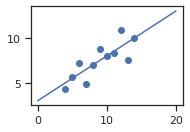

In [ ]:
ax1 = subplot(2, 2, 1)
scatter(df.x1, df.y1)
slope, intercept, r_value, p_value, std_err = linregress(df.x1, df.y1)
plot([0, xmax], [intercept, slope * xmax + intercept])
print("{0:.3f} {1:.2f} {2:.3f} {3:.3f} {4:.3f}".format(slope, intercept, r_value, p_value, std_err))

0.500 3.00 0.816 0.002 0.118


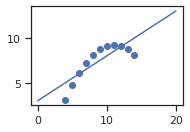

In [ ]:
subplot(2, 2, 2, sharex=ax1, sharey=ax1)
scatter(df.x2, df.y2)
slope, intercept, r_value, p_value, std_err = linregress(df.x2, df.y2)
plot([0, xmax], [intercept, slope * xmax + intercept])
print("{0:.3f} {1:.2f} {2:.3f} {3:.3f} {4:.3f}".format(slope, intercept, r_value, p_value, std_err))

0.500 3.00 0.816 0.002 0.118


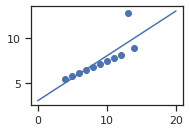

In [ ]:
subplot(2, 2, 3, sharex=ax1, sharey=ax1)
scatter(df.x3, df.y3)
slope, intercept, r_value, p_value, std_err = linregress(df.x3, df.y3)
plot([0, xmax], [intercept, slope * xmax + intercept])
print("{0:.3f} {1:.2f} {2:.3f} {3:.3f} {4:.3f}".format(slope, intercept, r_value, p_value, std_err))

0.500 3.00 0.817 0.002 0.118


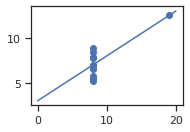

In [ ]:
subplot(2, 2, 4, sharex=ax1, sharey=ax1)
scatter(df.x4, df.y4)
slope, intercept, r_value, p_value, std_err = linregress(df.x4, df.y4)
plot([0, xmax], [intercept, slope * xmax + intercept])
print("{0:.3f} {1:.2f} {2:.3f} {3:.3f} {4:.3f}".format(slope, intercept, r_value, p_value, std_err))

Como puede verse, a pesar de que la forma de la nube de puntos es radicalmente diferente para cada par (xi, yi), los valores de la media y mediana son muy parecidos, y su recta de regresión es la misma. 

De ahí la importancia de visualizar los datos y no confiar tan sólo en los datos estadísticos.

# 1.2 Precios

In [4]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
from datetime import datetime, timedelta

In [7]:
!locale -a

C
C.UTF-8
en_US.utf8
es_ES
es_ES.iso88591
POSIX
spanish


In [1]:
import os

#!/usr/share/locales/install-language-pack es_ES
#!dpkg-reconfigure locales

# Restart Python process to pick up the new locales
#os.kill(os.getpid(), 9)

In [2]:
import locale

# Idioma "es-ES" (código para el español de España)
locale.setlocale(locale.LC_ALL, 'spanish')

'spanish'

In [8]:
precios = pd.read_csv('/content/drive/MyDrive/Visualización/Práctica 1/Precios_2019_20.csv', sep = ";", encoding='latin-1')
precios.head()

,Zona,Cultivo,Año,Mes,Precio
0,CANARIAS,Aguacate,2016,Enero,1.89
1,CANARIAS,Aguacate,2016,Febrero,1.97
2,CANARIAS,Aguacate,2016,Marzo,1.93
3,CANARIAS,Aguacate,2016,Abril,2.09
4,CANARIAS,Aguacate,2016,Mayo,2.42


In [9]:
precios['Precio'] = pd.to_numeric(precios['Precio'], errors = 'coerce')

In [10]:
precios_idx = precios[precios['Precio'].isna()].index
precios = precios.drop(precios_idx)

In [11]:
precios['Fecha'] = precios['Mes'] + '/' + precios['Año'].map(str)

In [12]:
precios['Fecha'] = pd.to_datetime(precios['Fecha'], format="%B/%Y")

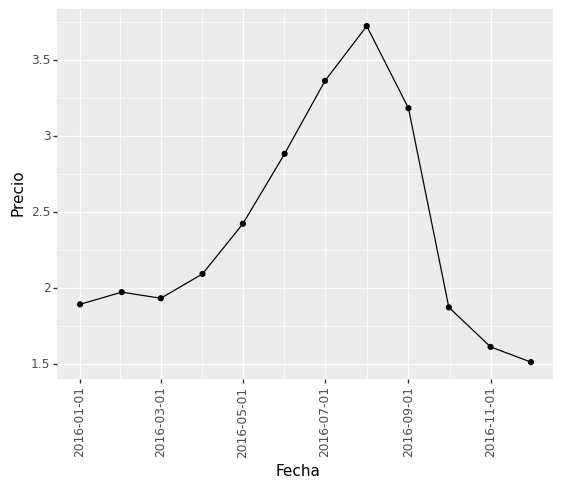

<ggplot: (8727070652037)>

In [19]:
(ggplot(precios[(precios['Cultivo'] == 'Aguacate') & (precios['Zona'] == 'CANARIAS') & (precios['Año'] == 2016)], aes(x="Fecha", y="Precio")) 
  + geom_point()
  + geom_line()
  #+ geom_smooth(method="lm", se = False)
  #+ facet_wrap('Año',  ncol = 4)
  + theme(axis_text_x = element_text(angle=90))
)

Aquí podemos ver la evolución de los precios del aguacate para toda Canarias a lo largo del año 2016. Como es de esperar, los precios son más bajos cuando se está en temporada de la fruta, al final del otoño y durante el invierno y el inicio de la primavera. Por contra, los precios de ponen por las nubes durante el resto del año, especialmente en verano.

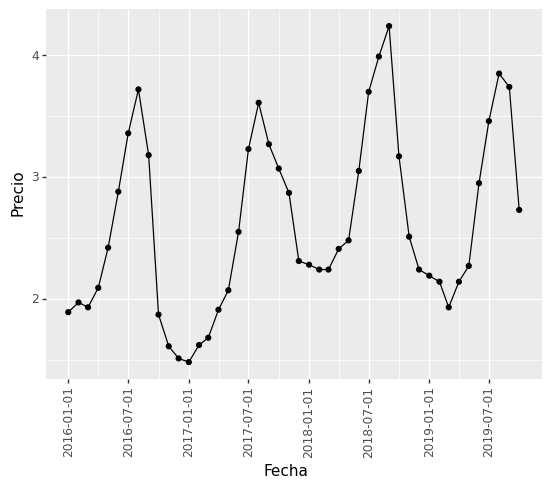

<ggplot: (8727071068569)>

In [17]:
(ggplot(precios[(precios['Cultivo'] == 'Aguacate') & (precios['Zona'] == 'CANARIAS')], aes(x="Fecha", y="Precio")) 
  + geom_point()
  + geom_line()
  #+ geom_smooth(method="lm", se = False)
  #+ facet_wrap('Fecha',  ncol = 4)
  + theme(axis_text_x = element_text(angle=90))
)

Como extensión a la gráfica anterior, aquí se muestra la evolución de los precios del aguacate para toda Canarias entre el año 2016 y el 2019. Vemos que el comportamiento antes descrito se repite de manera cíclica para todos los años, aunque con algunas diferencias. 

A principios del año 2017 se observa una gran bajada de los precios, lo cual viene seguido de un pico del precio para ese mismo año igual al del año anterior, 2016, lo que hace suponer que los niveles y costes de producción hasta 2018 seguían la misma tendencia, cosa que se ve interrumpida a partir de 2018, puesto que al inicio de ese año los precios no llegan a ser tan bajos como en años anteriores. Más aún, los precios en verano de ese mismo año alcanzan el máximo para este periodo de 4 años, tendencia que se ve repetida en 2019. Esto hace pensar que ha habido dificultades o sobrecostes para la producción de aguacates, ya que incluso en temporada los precios se mantienen altos.

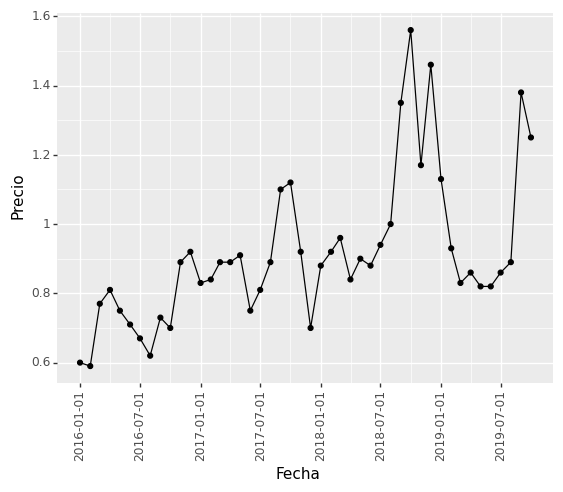

<ggplot: (8727070723333)>

In [18]:
(ggplot(precios[(precios['Cultivo'] == 'Papaya') & (precios['Zona'] == 'CANARIAS')], aes(x="Fecha", y="Precio")) 
  + geom_point()
  + geom_line()
  + theme(axis_text_x = element_text(angle=90))
)

Aquí observamos la evolución de los precios de la papaya para toda Canarias entre el año 2016 y el 2019. Debido a que la papaya es una fruta que se cultiva en zonas costeras de Canarias, las cuales generalmente gozan de temperaturas agradables la mayor parte del año, vemos que durante los años 2016 y 2017 los precios se mantienen más o menos constantes. No es así durante los años 2018 y 2019, años en los que el precio sube hasta casi duplicar su precio en algunos meses. 

Se puede observar que cuanto más sube el precio durante 2018 es durante el otoño. Esto podría hacer pensar en los supuestos problemas económicos que supusimos para el aguacate, o bien que 2018 y 2019 han sido años muy fríos que han dado al traste con la producción de frutas como la papaya, y posiblemente, el aguacate.